In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. Removing more columns to try and optimize the model
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN', 'NAME', 'ORGANIZATION'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
value_counts_classification = application_df.CLASSIFICATION.value_counts()
replace_class = list(value_counts_classification[value_counts_classification < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Look at ask_amt value counts for binning
value_counts_askamount = application_df.ASK_AMT.value_counts()
value_counts_askamount

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

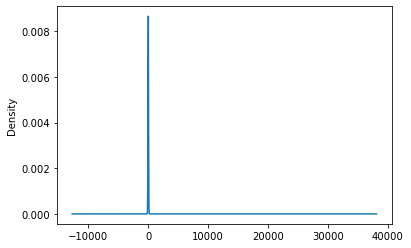

In [6]:
value_counts_askamount.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(value_counts_askamount[value_counts_askamount<5].index)

# Replace in dataframe
for app in replace_application:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(app,5001)
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()


5000    25398
5001     8901
Name: ASK_AMT, dtype: int64

In [8]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [9]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,5001,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
input_layer_test = len(X_train_scaled[0])
input_layer_test

47

In [14]:
input_layer = 47
hidden_layer1 = 8
hidden_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer1, input_dim=input_layer, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2, input_dim=input_layer, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 384       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [15]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt2/",exist_ok=True)
checkpoint_path = "checkpoints_opt2/weights.{epoch:02d}.hdf5"

In [17]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

In [18]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
 80/804 [=>............................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
162/804 [=====>........................] - ETA: 0s - loss: 0.6760 - accuracy: 0.5901
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
283/804 [=========>....................] - ETA: 0s - loss: 0.6601 - accuracy: 0.6299
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
369/804 [============>.................] - ETA: 0s - loss: 0.6544 - accuracy: 0.63 - ETA: 0s - loss: 0.6499 - accuracy: 0.6446
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.6391 - accuracy: 0.6579
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.6321 - accuracy: 0.6672
Epoch 00001: saving model to checkpoints_opt2\weights.01.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6274

346/804 [===========>..................] - ETA: 0s - loss: 0.5581 - accuracy: 0.7355
Epoch 00007: saving model to checkpoints_opt2\weights.07.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 0.5617 - accuracy: 0.7296
Epoch 00007: saving model to checkpoints_opt2\weights.07.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5624 - accuracy: 0.7289
Epoch 00007: saving model to checkpoints_opt2\weights.07.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5632 - accuracy: 0.7282
Epoch 00007: saving model to checkpoints_opt2\weights.07.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5635 - accuracy: 0.7276
Epoch 00007: saving model to checkpoints_opt2\weights.07.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5635 - accuracy: 0.7274
Epoch 8/50
 44/804 [>.............................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7088
Epoch 00008: saving model to checkpoints_opt2\weights.08.hdf5
164/804 [=====>...

750/804 [==========================>...] - ETA: 0s - loss: 0.5596 - accuracy: 0.7287
Epoch 00013: saving model to checkpoints_opt2\weights.13.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5608 - accuracy: 0.7272
Epoch 14/50
  1/804 [..............................] - ETA: 1s - loss: 0.4520 - accuracy: 0.8125
Epoch 00014: saving model to checkpoints_opt2\weights.14.hdf5
146/804 [====>.........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.7220
Epoch 00014: saving model to checkpoints_opt2\weights.14.hdf5
234/804 [=======>......................] - ETA: 0s - loss: 0.5633 - accuracy: 0.7217
Epoch 00014: saving model to checkpoints_opt2\weights.14.hdf5
318/804 [==========>...................] - ETA: 0s - loss: 0.5631 - accuracy: 0.7221
Epoch 00014: saving model to checkpoints_opt2\weights.14.hdf5
441/804 [===============>..............] - ETA: 0s - loss: 0.5629 - accuracy: 0.7236
Epoch 00014: saving model to checkpoints_opt2\weights.14.hdf5
525/804 [========

201/804 [======>.......................] - ETA: 0s - loss: 0.5623 - accuracy: 0.7253
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
312/804 [==========>...................] - ETA: 0s - loss: 0.5622 - accuracy: 0.7262
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
398/804 [=============>................] - ETA: 0s - loss: 0.5651 - accuracy: 0.7234
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5618 - accuracy: 0.7257
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5611 - accuracy: 0.7250
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5615 - accuracy: 0.7250
Epoch 00020: saving model to checkpoints_opt2\weights.20.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5589 - accuracy: 0.7275
Epoch 21/50
  1/804 [........

589/804 [====================>.........] - ETA: 0s - loss: 0.5605 - accuracy: 0.7271
Epoch 00026: saving model to checkpoints_opt2\weights.26.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5590 - accuracy: 0.7291
Epoch 00026: saving model to checkpoints_opt2\weights.26.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5585 - accuracy: 0.7296
Epoch 00026: saving model to checkpoints_opt2\weights.26.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5581 - accuracy: 0.7294
Epoch 27/50
 89/804 [==>...........................] - ETA: 0s - loss: 0.5641 - accuracy: 0.7251
Epoch 00027: saving model to checkpoints_opt2\weights.27.hdf5
168/804 [=====>........................] - ETA: 0s - loss: 0.5675 - accuracy: 0.7217
Epoch 00027: saving model to checkpoints_opt2\weights.27.hdf5
253/804 [========>.....................] - ETA: 0s - loss: 0.5626 - accuracy: 0.7271
Epoch 00027: saving model to checkpoints_opt2\weights.27.hdf5
392/804 [========

 41/804 [>.............................] - ETA: 0s - loss: 0.5677 - accuracy: 0.7279
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
168/804 [=====>........................] - ETA: 0s - loss: 0.5585 - accuracy: 0.7321
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
250/804 [========>.....................] - ETA: 0s - loss: 0.5578 - accuracy: 0.7326
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
332/804 [===========>..................] - ETA: 0s - loss: 0.5567 - accuracy: 0.7314
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 0.5568 - accuracy: 0.7299
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5537 - accuracy: 0.7325
Epoch 00033: saving model to checkpoints_opt2\weights.33.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5548 - accuracy: 0.7315
Epoch 00033: saving model to chec

404/804 [==============>...............] - ETA: 0s - loss: 0.5556 - accuracy: 0.7313
Epoch 00039: saving model to checkpoints_opt2\weights.39.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5554 - accuracy: 0.7309
Epoch 00039: saving model to checkpoints_opt2\weights.39.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5556 - accuracy: 0.7309
Epoch 00039: saving model to checkpoints_opt2\weights.39.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5563 - accuracy: 0.7300
Epoch 00039: saving model to checkpoints_opt2\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7291
Epoch 40/50
  1/804 [..............................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7188
Epoch 00040: saving model to checkpoints_opt2\weights.40.hdf5
135/804 [====>.........................] - ETA: 0s - loss: 0.5565 - accuracy: 0.7236
Epoch 00040: saving model to checkpoints_opt2\weights.40.hdf5
206/804 [======>.

804/804 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7287
Epoch 46/50
  1/804 [..............................] - ETA: 1s - loss: 0.4753 - accuracy: 0.8125
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
114/804 [===>..........................] - ETA: 0s - loss: 0.5513 - accuracy: 0.7368
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
197/804 [======>.......................] - ETA: 0s - loss: 0.5478 - accuracy: 0.7373
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
319/804 [==========>...................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7286
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
383/804 [=============>................] - ETA: 0s - loss: 0.5558 - accuracy: 0.7310
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5560 - accuracy: 0.7305
Epoch 00046: saving model to checkpoints_opt2\weights.46.hdf5
586/804 [========

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5635 - accuracy: 0.7231
Loss: 0.5635260939598083, Accuracy: 0.7231487035751343
